## 多目标跟踪之卡尔曼滤波
> - 为后期写多目标跟踪准备的算法(用来多目标跟踪预测）
> - 多目标跟踪匹配算法:
> - [多目标跟踪之二分图无权匹配——匈牙利算法](https://aistudio.baidu.com/aistudio/projectdetail/2037584)
> - [多目标跟踪加权二分图匹配 ——KM](https://aistudio.baidu.com/aistudio/projectdetail/2040378)
### 1 定义
只要是存在不确定信息的动态系统，卡尔曼滤波就可以对系统下一步要做什么做出有根据的推测。即便有噪声信息干扰，卡尔曼滤波通常也能很好的弄清楚究竟发生了什么，找出现象间不易察觉的相关性因此卡尔曼滤波非常适合不断变化的系统，它的优点还有内存占用较小（只需保留前一个状态）、速度快，是实时问题和嵌入式系统的理想选择。
### 2 应用
比如跟踪目标，但目标的位置、速度、加速度的测量值往往在任何时候都有噪声。卡尔曼滤波利用目标的动态信息,设法去掉噪声的影响，得到一个关于目标位置的好的估计。这个估计可以是对当前目标位置的估计(滤波)，也可以是对于将来位置的估计(预测)，也可以是对过去位置的估计(插值或平滑)。

### 3 卡尔曼滤波眼里的行人跟踪问题
> - *下面是图例公式的描述,初学同学可能有点蒙，建议去查一下卡尔曼滤波相关视频（然后发现还是蒙/坏笑/,但每次的学习都会有新的发现/加油/）*
> - *下面是UP学习了不错文章作者[Bzarg](http://www.bzarg.com/p/how-a-kalman-filter-works-in-pictures/)*
- 一个包含位置信息和速度信息的状 x=（p,v）
- 卡尔曼滤波假设两个变量（在我们的例子里是位置和速度）都应该是随机的，而且符合高斯分布。如下图
![](https://ai-studio-static-online.cdn.bcebos.com/af3968a28186442a8cd98cc920fc7958b9d2181e2ceb45829a722e125c537819)

- 位置和速度是不相关的，这意味着我们不能从一个变量推测另一个变量。那么如果位置和速度相关呢？如下图所示，人前往特定位置的可能性取决于它拥有的速度。
![](https://ai-studio-static-online.cdn.bcebos.com/7c58a0b53865436fa835cb9abc38ef7ca6ce4bfe0217475081bd12451f2aa78f)

- 这不难理解，如果基于旧位置估计新位置，我们会产生这两个结论：如果速度很快，人可能移动得更远，所以得到的位置会更远；如果速度很慢，人就走不了那么远。
- 这种关系对目标跟踪来说非常重要，因为它提供了更多信息：一个可以衡量可能性的标准。这就是卡尔曼滤波的目标：从不确定信息中挤出尽可能多的信息！
- 为了捕获这种相关性，我们用的是协方差矩阵。简而言之，矩阵的每个值是第i个变量和第j个变量之间的相关程度（由于矩阵是对称的，i和j的位置可以随便交换）。我们用表示协方差矩阵，在这个例子中，就是![](https://ai-studio-static-online.cdn.bcebos.com/ad32051f3f344b5296eabf438659e9d0e97cafee13d74a36a3bd0cff24175015)。

![](https://ai-studio-static-online.cdn.bcebos.com/4a2457e92c8a4354adc1d35f0fa54f1b9cf6385c13d6481b86c2a40d239e0fef)

- 为了把以上关于状态的信息建模为高斯分布（图中色块），我们还需要k时的两个信息：最佳估计![](https://ai-studio-static-online.cdn.bcebos.com/b8737a42689f4f98a64c5a98913d9ebd80e2ab68343846279148e2f173709287)（均值，也就是![](https://ai-studio-static-online.cdn.bcebos.com/26247db2d173431286c9a8b0395f092add68440671fb47409c25c9374874a71d)，协方差矩阵![](https://ai-studio-static-online.cdn.bcebos.com/d88c6f51d4bd4883b7ab00212a95cb73680a79b87f4e4a29881e867582ae6138)。（虽然还是用了位置和速度两个变量，但只要和问题相关，卡尔曼滤波可以包含任意数量的变量）

![](https://ai-studio-static-online.cdn.bcebos.com/689f025f26544fb39b6a4541b97cafe0f018236ddced48efae7f52e04a0b34b1)

- 接下来，我们要通过查看当前状态（k-1时）来预测下一个状态（k时）。这里我们查看的状态不是真值，但预测函数无视真假，可以给出新分布：
![](https://ai-studio-static-online.cdn.bcebos.com/1f9a8375ddc540f183243a11ac15315926f67c1f330b43d08f5fe307b2d92604)

我们可以用矩阵![](https://ai-studio-static-online.cdn.bcebos.com/3a0f5d6fc53641668d471a8fe32343c69966fcd021e9440d92b4ae913772dcfd)表示这个预测步骤：

![](https://ai-studio-static-online.cdn.bcebos.com/fe0fa35b70764bb0a039b1b56c796d63608da4166dde492e8db4ba67a2fa1d86)

- 它从原始预测中取每一点，并将其移动到新的预测位置。如果原始预测是正确的，系统就会移动到新位置。这是怎么做到的？为什么我们可以用矩阵来预测人下一刻的位置和速度？下面是个简单公式：

![](https://ai-studio-static-online.cdn.bcebos.com/5e43c20da71a45b5a3641ec12a464b3d98f204fca48e4178ae5b113706b858a1)

- 换成矩阵形式：

![](https://ai-studio-static-online.cdn.bcebos.com/916c059ddb5046e5aadbfb6417485177be8142566e99471eaf5c3cfc7b6aacff)

- 这是一个预测矩阵，它能给出人的下一个状态，但目前我们还不知道协方差矩阵的更新方法。这也是我们要引出下面这个等式的原因：如果我们将分布中的每个点乘以矩阵A，那么它的协方差矩阵会发生什么变化

![](https://ai-studio-static-online.cdn.bcebos.com/3f8cccd16083452b83029e89017bd99f15a6c75e5d0f4a9b8e01d83d8dfdf248)

把这个式子和上面的最佳估计![](https://ai-studio-static-online.cdn.bcebos.com/1b0340af86c64bbe8b553880b7155c38851ea38a198a4d05bd32504f62add01c) 结合，可得：

![](https://ai-studio-static-online.cdn.bcebos.com/0d5639ad69e64aa0b9de8b3f394f1bb09d3677449e5c49c1ba224db4dfe7acf2)

- **外部影响**
- 但是，除了速度和位置，外因也会对系统造成影响。比如模拟火车运动，除了列车自驾系统，列车操作员可能会手动调速。在我们的机器人示例中，导航软件也可以发出停止指令。对于这些信息，我们把它作为一个向量![](https://ai-studio-static-online.cdn.bcebos.com/3e63c7cbeac440c58e778fa8500d3d73594d0a19c9ef4691a22e34d0c6f5ceaf)，纳入预测系统作为修正。假设油门设置和控制命令是已知的，我们知道火车的预期加速度a。根据运动学基本定理，我们可得：

![](https://ai-studio-static-online.cdn.bcebos.com/9d6e701f65954c40bbeec8a02ddf8bfafdaa156dd44c4bc7b60b3c4f77b419a5)

- 把它转成矩阵形式：

![](https://ai-studio-static-online.cdn.bcebos.com/19f0fc6751ee490392047e9d1e3e5de04222c7fbe4c5436381ba169d6442b5a6)

- ![](https://ai-studio-static-online.cdn.bcebos.com/c41c923d78c4414b8f6ce1c888abecb7ac7aa0ae52a84aca89b6d207a8fd13eb)是控制矩阵，![](https://ai-studio-static-online.cdn.bcebos.com/41939a6f338143bb94d2c31a57c88e379d8254aeffac4fccb3cf056e468b28ef)是控制向量。如果外部环境异常简单，我们可以忽略这部分内容，但是如果添加了外部影响后，模型的准确率还是上不去，这又是为什么呢？

- **外部不确定性**

- 但是，如果存在我们不知道的力量呢？当我们监控无人机时，它可能会受到风的影响；当我们跟踪轮式机器人时，它的轮胎可能会打滑，或者粗糙地面会降低它的移速。这些因素是难以掌握的，如果出现其中的任意一种情况，预测结果就难以保障。这要求我们在每个预测步骤后再加上一些新的不确定性，来模拟和“世界”相关的所有不确定性：

![](https://ai-studio-static-online.cdn.bcebos.com/95d9bb4fcdf949fb9e6552b770353e66bf58ea7d43f14ad89b9b2a31fbd4a4aa)

- 如上图所示，加上外部不确定性后，![](https://ai-studio-static-online.cdn.bcebos.com/bd014219d5df448688c35f4126b8786f172108a3a17942049ae599bebb25205b)的每个预测状态都可能会移动到另一点，也就是蓝色的高斯分布会移动到紫色高斯分布的位置，并且具有协方差![](https://ai-studio-static-online.cdn.bcebos.com/1b2b4d81fa8d48d9863f7a080752eb42da1f035fb867407c97edf978c431f209)。换句话说，我们把这些不确定影响视为协方差![](https://ai-studio-static-online.cdn.bcebos.com/e3de358f13524daf9c1dbdaea578dcfd1dc1a01f4f204180aa842df49c015d3a)的噪声。

![](https://ai-studio-static-online.cdn.bcebos.com/bb16a7d60c834a198272fcc4ee1b3f6291d563d8ad8e458887401d175a83f9b3)

- 这个紫色的高斯分布拥有和原分布相同的均值，但协方差不同。

![](https://ai-studio-static-online.cdn.bcebos.com/f83947179140411c9f9d586098213804339f24de26fe40048da856fb4acb70ee)

我们在原式上加入![](https://ai-studio-static-online.cdn.bcebos.com/2abdfa9261bd47eaa286f7cbfee7132417dcc44038a64c9baf2f915964a8f026)

![](https://ai-studio-static-online.cdn.bcebos.com/ebe3078ae5c741d2b9d65299a81b49a29698c328b6e64fd59c4aaac70f49284f)

> - 新的最佳估计是基于原最佳估计和已知外部影响矫正后得到的预测
> - 新的不确定性是基于原不确定性和外部环境不确定性得到的预测

- **通过测量来细化估计值**

- 我们可能有好几个传感器，它们一起提供有关系统状态的信息。传感器的作用不是我们关心的重点，它可以读取位置，可以读取速度，重点是，它能告诉我们关于状态的间接信息——它是状态下产生的一组读数。

![](https://ai-studio-static-online.cdn.bcebos.com/12618adc4d32459f9683c6f1870ee578736591164d3d44c7a673089f87361922)

- 请注意，读数的规模和状态的规模不一定相同，所以我们把传感器读数矩阵设为![](https://ai-studio-static-online.cdn.bcebos.com/3a9b801ea0364b40b63f9038c647d01b93d037a5c0384b528833c4aa91a5314d)

![](https://ai-studio-static-online.cdn.bcebos.com/33c836218ac044308c4d05cb550246b213a4e19cf3b44e9090e3db0477d34735)

- 把这些分布转换为一般形式

![](https://ai-studio-static-online.cdn.bcebos.com/ca8d7ed938664a6db30aca192add54b712c8b196952a458292213d48ce4a0c11)

- 卡尔曼滤波的一大优点是擅长处理传感器噪声。换句话说，由于种种因素，传感器记录的信息其实是不准的，一个状态事实上可以产生多种读数。

![](https://ai-studio-static-online.cdn.bcebos.com/15858664dd154228b41ddacdea8104d7fe82ad3059da48daba569250b6fe3558)

- 我们将这种不确定性（即传感器噪声）的协方差设为![](https://ai-studio-static-online.cdn.bcebos.com/7eadba65b2fd469d8e1af2dbaa3c439b4129141247c04d568a17ceeda2ab14fa)，读数的分布均值设为![](https://ai-studio-static-online.cdn.bcebos.com/c6b38c37a7bf4b86a2716f3262b69ef7c84a1a779c314bb7bf56ad09f8a48a8e)。现在我们得到了两块高斯分布，一块围绕预测的均值，另一块围绕传感器读数。

![](https://ai-studio-static-online.cdn.bcebos.com/38a0d9601f404fb69ef704a124fe01c86bc55432217949b48c4a574fdcaa38b4)

- 如果要生成靠谱预测，模型必须调和这两个信息。也就是说，对于任何可能的读数![](https://ai-studio-static-online.cdn.bcebos.com/858ca8c565a94cebbdfb3e40436936b68d3d7f9a64084ca5b9174011fb45ddc2)，这两种方法预测的状态都有可能是准的，也都有可能是不准的。重点是我们怎么找到这两个准确率。最简单的方法是两者相乘：

![](https://ai-studio-static-online.cdn.bcebos.com/e9aecc11b15f4284847c650d223dac5f1245d8da173f4cf988c58db9ef5741c5)

- 两块高斯分布相乘后，我们可以得到它们的重叠部分，这也是会出现最佳估计的区域。换个角度看，它看起来也符合高斯分布：

![](https://ai-studio-static-online.cdn.bcebos.com/0ddc7b27eec14ba58d30e701069a52bc831778ec337a45fb94b11bb306146be8)

- 事实证明，当你把两个高斯分布和它们各自的均值和协方差矩阵相乘时，你会得到一个拥有独立均值和协方差矩阵的新高斯分布。最后剩下的问题就不难解决了：我们必须有一个公式来从旧的参数中获取这些新参数！

- **结合高斯**
- 两条高斯曲线相乘

![](https://ai-studio-static-online.cdn.bcebos.com/318972c2aabb44ae85916cec8831d2c4062f7015b1c749d89c3c56621605d27f)

- 按照一维方程进行扩展，可得

![](https://ai-studio-static-online.cdn.bcebos.com/f27ee6439bdd4dc9b3553e9daea05d9c5c8ac306974a4ca784c5a84099f035cb)

- 用k简化一下

![](https://ai-studio-static-online.cdn.bcebos.com/5f0ff3d9453a4ab7912c55de55a7b4a24653b9d9b8d1490e8b0fda294efb59e3)

- 以上是一维的内容，如果是多维空间，把这个式子转成矩阵格式

![](https://ai-studio-static-online.cdn.bcebos.com/b7a6dc8a9fbc40469b2d704a9d593346fde71ac0075149b6a63b8f8128104d5c)

- 这个矩阵![](https://ai-studio-static-online.cdn.bcebos.com/fdc43dd269cb43a8be4c8cb38b4a167f30dc66f40cdd4b338dfec0a53fcbe4db)就是我们说的卡尔曼增益
- **结合在一起**
- 截至目前，我们有用矩阵![](https://ai-studio-static-online.cdn.bcebos.com/e9b4701bac554b9f8e6f7a0f00a2aa83ece09f1fc0c043069c6e2a4beb2332bf)预测的分布，有用传感器读数![](https://ai-studio-static-online.cdn.bcebos.com/32d7a5784c264e8cb6b0897b83086880c2ab90a793f84eb7bccacf8b1faebd9a)预测的分布。把它们代入上节的矩阵等式中：

![](https://ai-studio-static-online.cdn.bcebos.com/b7405302bccf479999529793accd8895776c3c29280d48f69c12a2f1d6b2693a)

- 相应的，卡尔曼增益就是：

![](https://ai-studio-static-online.cdn.bcebos.com/5021b4a17d144548bc49bc5f67a21a8b4cd6fdc5e4944b79a872d72407b97cc8)

考虑到![](https://ai-studio-static-online.cdn.bcebos.com/dd4e3269ffbf4ac98b703cfcbafc13763fad54a3103b439d849b5df60feb2df3)里还包含着一个![](https://ai-studio-static-online.cdn.bcebos.com/1af86486b7f145158bd28b9ab522b5c071e5aba9ecbb4477916401e2283154c6)，我们再精简一下上式

![](https://ai-studio-static-online.cdn.bcebos.com/8d0a2e0edbb0485a9e966a2830175d8e48ebdd51b8084a4c9d428de3e5707c3f)

最后，![](https://ai-studio-static-online.cdn.bcebos.com/4ff4aa4921714f8695e84ffccbf00fd06f0f52b5f4994bb6b5660398ea422bb5)是我们的最佳估计值，我们可以把它继续放进去做另一轮预测

![](https://ai-studio-static-online.cdn.bcebos.com/294e50c15dfc40a2993ffc972fc21d1c6ed4fa2b0c1d4a0ead84e36908d04c8e)

### 4 代码实现

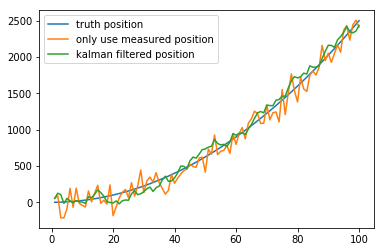

In [9]:
import matplotlib.pyplot as plt

# 模拟数据
t = np.linspace(1,100,100)
# print(t)
a = 0.5
position = (a * t**2)/2
# print(position)

position_noise = position+np.random.normal(0,120,size=(t.shape[0])) 

plt.plot(t,position,label='truth position')  # 原值
plt.plot(t,position_noise,label='only use measured position')  # 加入噪声的值


# 初始的估计的位置就直接用GPS测量的位置
predicts = [position_noise[0]]
position_predict = predicts[0]

predict_var = 0
odo_var = 120**2 #这是我们自己设定的位置测量仪器的方差，越大则测量值占比越低
v_std = 50 # 测量仪器的方差
for i in range(1,t.shape[0]):
  
    dv =  (position[i]-position[i-1]) + np.random.normal(0,50) # 模拟从惯性测量单元IMU读取出的速度
    position_predict = position_predict + dv # 利用上个时刻的位置和速度预测当前位置
    predict_var += v_std**2 # 更新预测数据的方差
    # 下面是Kalman滤波
    position_predict = position_predict*odo_var/(predict_var + odo_var)+position_noise[i]*predict_var/(predict_var + odo_var)
    predict_var = (predict_var * odo_var)/(predict_var + odo_var)**2
    predicts.append(position_predict)

    
plt.plot(t,predicts,label='kalman filtered position')  # 滤波后的值

plt.legend()
plt.show()

# 卡尔曼滤波将噪声值（橙色线），滤波后（绿色线），尽量去拟合原值（蓝色线）

### 小结
> - 以上是作者平时学习做的项目笔记，不同见解欢迎各位大佬指正
> - 奥利给
> - 如若存在问题，可在评论区留言，作者会不时为大家讲解
> - 作者aistudio主页链接，欢迎各位互粉、提问：[aistudio](https://aistudio.baidu.com/aistudio/personalcenter/thirdview/539945)

请点击[此处](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576)查看本环境基本用法.  <br>
Please click [here ](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576) for more detailed instructions. 